In [28]:
#importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [29]:
#loading the time series data 
data = pd.read_csv('AirPassengers.csv')

In [30]:
#EDA on the time series data 
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [31]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [32]:
data['Month'] = pd.to_datetime(data['Month'])
data.index = data['Month']
del data['Month']

In [33]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

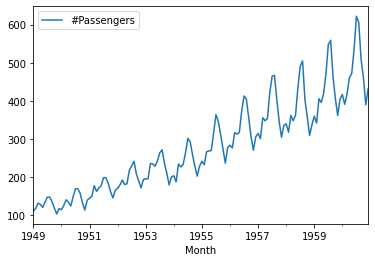

In [34]:
#plotting the time series
data.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

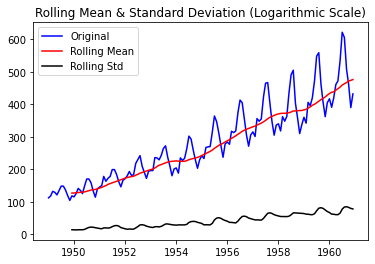

In [35]:
# Test for rolling statistics
mean_log = data.rolling(window=12).mean() #rolling() --> Works for computing the moving statistical values
std_log = data.rolling(window=12).std()

# Each value in the rolling mean series is the average of the current value and the previous 11 values

plt.plot(data, color='blue', label='Original')  # Plotting for the whole dataset --> Blue
plt.plot(mean_log, color='red', label='Rolling Mean') # Plotting for rolling mean --> Red
plt.plot(std_log, color='black', label='Rolling Std') # Plotting for rolling std  --> Black
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [36]:
# Test for ADCF
#checking the stationarity of the series 
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['#Passengers'])
print(result)
result1 = pd.Series(result[0:3], index = ['Test Statistic','p-value','Numbr of observations used'])
print(result1)

(0.8153688792060463, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
Test Statistic                 0.815369
p-value                        0.991880
Numbr of observations used    13.000000
dtype: float64


<AxesSubplot:xlabel='Month'>

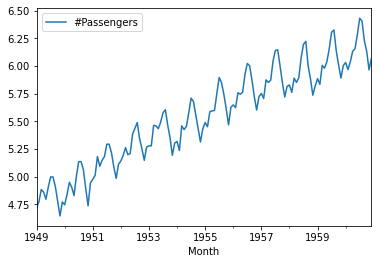

In [37]:
#logrithmic computation to make the time series stationary
first_log = np.log(data)
first_log = first_log.dropna()  # Removing the null values if any are present
first_log.plot()

In [38]:
first_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

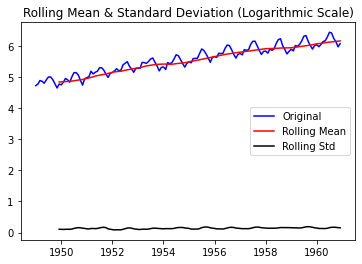

In [39]:
mean_log1 = first_log.rolling(window=12).mean()
std_log1 = first_log.rolling(window=12).std()

plt.plot(first_log, color='blue', label='Original')
plt.plot(mean_log1, color='red', label='Rolling Mean')
plt.plot(std_log1, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [40]:
mean_log1

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,6.124517
1960-09-01,6.132246
1960-10-01,6.142628


In [41]:
# Detrending --> It helps to isolate the underlying patterns in the data that are not related to any systematic trend
new_data = first_log - mean_log1  
new_data = new_data.dropna()
new_data 

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [42]:
#adfuller test for stationarity
result = adfuller(new_data['#Passengers'])
print(result)
result1 = pd.Series(result[0:3], index = ['Test Statistic','p-value','Numbr of observations used'])
result1

(-3.1629079913008753, 0.022234630001242737, 13, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -436.63269481747034)


Test Statistic                -3.162908
p-value                        0.022235
Numbr of observations used    13.000000
dtype: float64

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

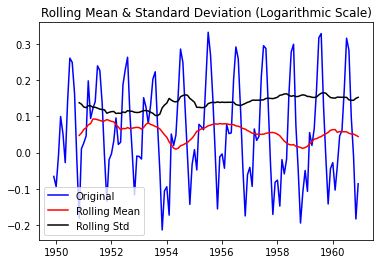

In [43]:
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()

plt.plot(new_data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [44]:
result = adfuller(new_data['#Passengers'])
print(result)

(-3.1629079913008753, 0.022234630001242737, 13, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -436.63269481747034)


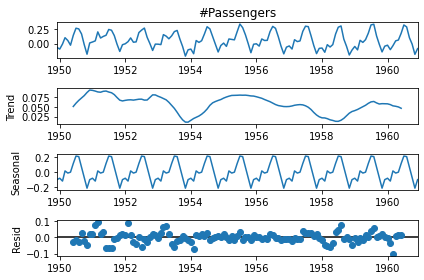

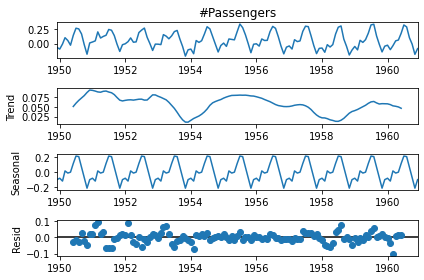

In [45]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(new_data['#Passengers'].dropna())

decompose_result.plot()

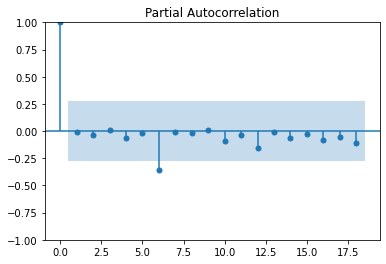

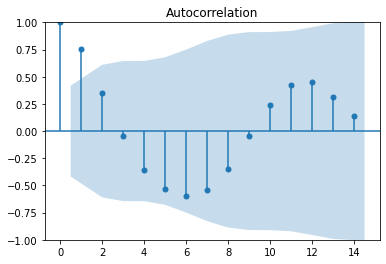

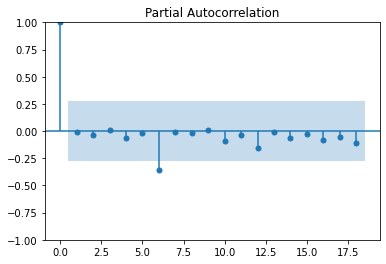

In [46]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
acf_plot=acf(new_data)
pacf_plot=pacf(new_data, nlags=50)
plot_acf(acf_plot)
plot_pacf(pacf_plot)

In [47]:
# from pmdarima.arima import auto_arima

# model = auto_arima(new_data, seasonal=True, m=12, suppress_warnings=True)
# print(model.order)

In [48]:
from statsmodels.tsa.arima.model import ARIMA

train = new_data.iloc[:120]['#Passengers']
test = new_data.iloc[121:]['#Passengers']

model = ARIMA(train, order=(1,0,2))
model_fit = model.fit()

In [49]:
a = [0,1,2,3,4]
len(a)
a.index(4)

4

<AxesSubplot:xlabel='Month'>

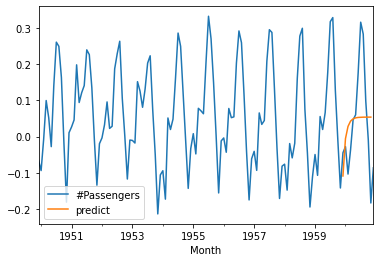

In [50]:
# Performing the prediction for both training and testing set at once
new_data['predict'] = model_fit.predict(start= len(train), 
                                    end=len(train)+len(test)- 1, 
                                    dynamic=True)
new_data[['#Passengers','predict']].plot()

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(1,0,2), seasonal_order=(1,0,2,12))
model = model.fit()

<AxesSubplot:xlabel='Month'>

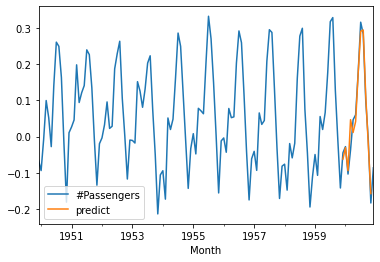

In [52]:
new_data['predict'] = model.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1, 
                                                       dynamic=True)
new_data[['#Passengers','predict']].plot()

<AxesSubplot:xlabel='Month'>

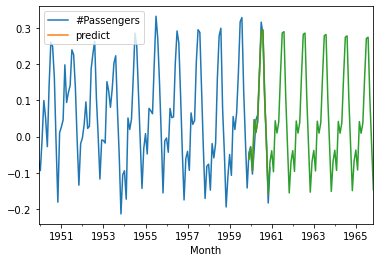

In [53]:
#predicting the projections for the next 5 years
forecast = model.forecast(steps=72)  # 12*5
new_data.plot()
forecast.plot()

In [54]:
new_data.tail()

,#Passengers,predict
Month,,
1960-08-01,0.282363,0.293687
1960-09-01,0.098235,0.111397
1960-10-01,-0.009230,-0.023565
1960-11-01,-0.182690,-0.156784
1960-12-01,-0.085789,NaN


In [55]:
  forecast.tail()

1965-07-01    0.270409
1965-08-01    0.273616
1965-09-01    0.103694
1965-10-01   -0.022262
1965-11-01   -0.146750
Freq: MS, Name: predicted_mean, dtype: float64

THANK YOU